# ¡Hola, Cesar!  

Mi nombre es Carlos Ortiz, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 


### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame
data=pd.read_csv('/datasets/vehicles_us.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de librerías y de datos.
</div>

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [3]:
# imprime la información general/resumida sobre el DataFrame
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [5]:
# imprimir una muestra de datos
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Al observar, se encuentran 13 columnas y 51525 filas. Y desde ya se pueden detectar algunos problemas, ya que las columnas 'model_year', 'cylinders', 'odometer', 'paint_color' y 'is_4wd' tienen valores faltantes.

La columna 'date_posted' debe ser de tipo date time y no int64 y la columna 'is_4wd' debería ser booleano.

Detecto que hay valores ausentes (NaN) en varias columnas.

La columna paint_color y odometer contienen una mayor cantidad de valores faltantes en comparación con las demás. Es posible que se necesite investigar más a fondo los valores faltantes en estas columnas numéricas para determinar si se pueden rellenar de alguna manera o si se deben eliminar filas con demasiados valores faltantes.

### Conclusiones y siguientes pasos

He leído el archivo y veo que tiene 13 columnas y 51525 filas.

He encontrado algunos problemas con algunas de las columnas, como valores faltantes y tipos de datos incorrectos.

Voy a intentar corregir estos problemas para que se pueda realizar un análisis completo del conjunto de datos.

Intentaré imputar los valores faltantes utilizando técnicas como la media, la mediana o la moda, a la vez cambiaré el tipo de datos de la columna 'date_posted' a fecha/hora, y también voy a convertir la columna 'is_4wd' a un tipo de datos booleano.

## Tratar los valores ausentes (si hay)

In [6]:
data['is_4wd'].unique()

array([ 1., nan])

La columna 'is_4wd' tiene dos valores posibles: 1 o NaN. 1 indica que el coche es 4WD, mientras que NaN indica que el valor es desconocido. 

Rellenaré los valores NaN con 0, lo que indica que el coche no es 4WD. Ya con esto, podré convertir la columna a un tipo de datos booleano, donde 1 se convertirá en 'Verdadero' y 0 se convertirá en 'Falso'.

In [7]:
data['is_4wd'] = data['is_4wd'].where(data['is_4wd'] == 1, 0)

In [8]:
data['is_4wd'] = data['is_4wd'].astype('bool')

data['is_4wd'].unique()

array([ True, False])

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

La columna se convirtió en booleana y ya no faltan más valores.

In [9]:
data['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [10]:
data['type'] = data['type'].str.lower()

In [11]:
data['type'].unique()

array(['suv', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

Solamente hice la modificación de 'SUV' a minuscula, nada más fué requerido.

In [12]:
data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Parece ser que el kilometraje de los coches ('odometer') no es uniforme, sino que varía según el año del modelo y el estado del coche. Por lo que no quiero rellenar los valores que faltan por la mediana, ya que esto puede dar como resultado valores que no son precisos/correctos. Creo que rellenando los valores que faltan de una manera que tenga en cuenta el año del modelo sería una mejor opción.

Así se podrán rellenar los valores del kilometraje que faltan de una manera más precisa y significativa.

In [13]:
cond_mileage_medians = data.groupby(['condition'])['odometer'].median().to_dict()

def fill_odometer(row):
    if np.isnan(row['odometer']):
        return cond_mileage_medians[row['condition']]
    return row['odometer']
   
data['odometer'] = data.apply(fill_odometer, axis=1)

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


In [14]:
data['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [15]:
cylinder_map = data.groupby('model')['cylinders'].median().to_dict()

def cylinders_fill(row):
    if np.isnan(row['cylinders']):
        return cylinder_map.get(row['model'])
    return row['cylinders']
    
data['cylinders'] = data.apply(cylinders_fill, axis=1)

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


In [16]:
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [17]:
model_year_medians = data.groupby(['model'])['model_year'].median().to_dict()

def fill_model_year(row):
    if np.isnan(row['model_year']):
        return model_year_medians[row['model']]
    return row['model_year']
   
data['model_year'] = data.apply(fill_model_year, axis=1)
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


Apliqué el mismo método en las últimas columnas, y al parecer no ha cambiado mucho.

## Corregir los tipos de datos

No creo que sea necesario, por el momento mantendré la informacion.

## Enriquecer datos

In [18]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
data['date_posted'] = pd.to_datetime(data['date_posted'])
data['ad_month'] = data['date_posted'].dt.month_name()
data['ad_year'] = data['date_posted'].dt.year
data.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_month,ad_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,June,2018
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,October,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,February,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9,March,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,April,2019


In [19]:
# Agrega los años del vehículo cuando el anuncio se colocó
data['age_posted'] = data['ad_year'] - data['model_year'] + 1
data['ad_month'] = data['date_posted'].dt.month_name()
data['ad_year'] = data['date_posted'].dt.year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_month,ad_year,age_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,June,2018,8.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,October,2018,8.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,February,2019,7.0
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9,March,2019,17.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,April,2019,3.0


In [20]:
data['age_posted'] = data['ad_year'] - data['model_year'] + 1
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_month,ad_year,age_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,June,2018,8.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,October,2018,8.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,February,2019,7.0
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9,March,2019,17.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,April,2019,3.0


In [21]:
# Agrega el millaje promedio del vehículo por año
data['avg_yearly_mileage'] = data['odometer'] / data['age_posted']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_month,ad_year,age_posted,avg_yearly_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,June,2018,8.0,18125.000000
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,October,2018,8.0,11088.125000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,February,2019,7.0,15714.285714
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9,March,2019,17.0,10683.117647
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,April,2019,3.0,26967.666667


In [22]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
data['condition'] = data['condition'].where(data['condition'] != 'salvage', 0 )

data['condition'] = data['condition'].where(data['condition'] != 'fair', 1 )

data['condition'] = data['condition'].where(data['condition'] != 'good', 2 )

data['condition'] = data['condition'].where(data['condition'] != 'excellent', 3)

data['condition'] = data['condition'].where(data['condition'] != 'like new', 4)

data['condition'] = data['condition'].where(data['condition'] != 'new', 5 )

data['condition'] = data['condition'].astype('int')

In [23]:
data['condition'].unique()

array([2, 4, 1, 3, 0, 5])

## Comprobar datos limpios

In [24]:
# imprime la información general/resumida sobre el DataFrame
data.head()  

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_month,ad_year,age_posted,avg_yearly_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,June,2018,8.0,18125.000000
1,25500,2011.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,October,2018,8.0,11088.125000
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,February,2019,7.0,15714.285714
3,1500,2003.0,ford f-150,1,8.0,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9,March,2019,17.0,10683.117647
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,April,2019,3.0,26967.666667


In [25]:
data.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_month,ad_year,age_posted,avg_yearly_mileage
51520,9249,2013.0,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,October,2018,6.0,14689.333333
51521,2700,2002.0,honda civic,0,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,November,2018,17.0,10676.470588
51522,3950,2009.0,hyundai sonata,3,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,November,2018,10.0,12800.000000
51523,7455,2013.0,toyota corolla,2,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,July,2018,6.0,23262.166667
51524,6300,2014.0,nissan altima,2,4.0,gas,129000.0,automatic,sedan,NaN,False,2018-06-05,10,June,2018,5.0,25800.000000


In [26]:
data.describe()

,price,model_year,condition,cylinders,odometer,days_listed,ad_year,age_posted,avg_yearly_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793954,2.637535,6.121067,115199.014508,39.55476,2018.307462,9.513508,15379.044862
std,10040.803015,6.099296,0.712447,1.657457,60484.863376,28.20427,0.461447,6.112895,11808.897916
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,19.00000,2018.000000,5.000000,9363.636364
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,33.00000,2018.000000,8.500000,13038.000000
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,53.00000,2019.000000,13.000000,18222.222222
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,2019.000000,111.000000,373200.000000


In [27]:
# imprimir una muestra de datos
muestra1 = data.sample(n=10) 
print(muestra1)


       price  model_year                     model  condition  cylinders  \
50436  14995      2013.0                honda cr-v          3        4.0   
17260   2200      1995.0       chevrolet silverado          2        6.0   
19169   4500      2009.0           hyundai elantra          3        4.0   
4013   15991      2015.0             toyota sienna          3        6.0   
47928  13000      2005.0                ford f-250          2        8.0   
28704   3495      2008.0             nissan altima          3        4.0   
840    11500      2003.0  chevrolet silverado 1500          2        8.0   
5256    6700      2005.0                 ford f150          2        6.0   
2138    4500      2006.0               ford ranger          1        6.0   
28652   3200      2004.0           toyota camry le          3        4.0   

         fuel  odometer transmission       type paint_color  is_4wd  \
50436     gas   60150.0    automatic      wagon         NaN    True   
17260     gas  178000

Agregé las columnas ad_weekday, ad_month, ad_year, avg_yearly_mileage y age_posted al conjunto de datos.

También he calculado las columnas ad_weekday, ad_month, ad_year y avg_yearly_mileage.

Cambié los valores de "condition" por los números correspondientes.

## Estudiar parámetros principales


Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

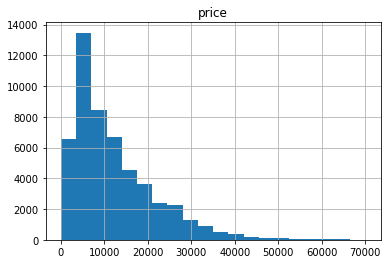

In [28]:
data['price'].hist(bins=20, range=(0, 70000))
plt.title('price')
plt.show()



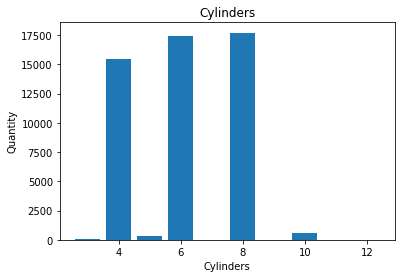

In [29]:
counts = data['cylinders'].value_counts()
labels = counts.index
values = counts.values

plt.bar(labels, values)
plt.title('Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Quantity')
plt.show()



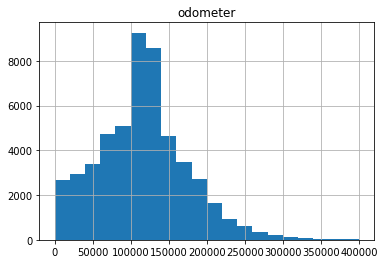

In [30]:
data['odometer'].hist(bins=20, range=(0, 400000))
plt.title('odometer')
plt.show()



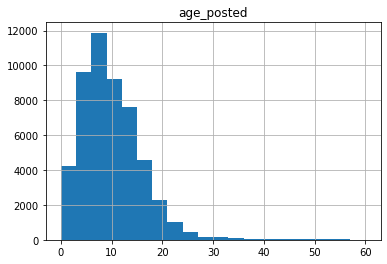

In [31]:
data['age_posted'].hist(bins=20, range=(0, 60))
plt.title('age_posted')
plt.show()



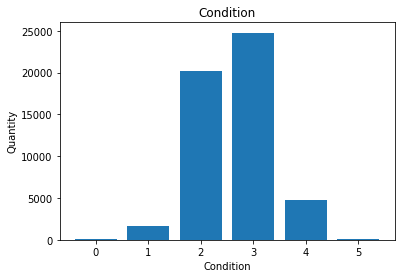

In [32]:
counts = data['condition'].value_counts()
labels = counts.index
values = counts.values

plt.bar(labels, values)
plt.title('Condition')
plt.xlabel('Condition')
plt.ylabel('Quantity')
plt.show()



En el histograma de price, logoro ver que la mayoría de los coches se venden por menos de 40000 dólares. Hay unos pocos coches que se venden por más de 40000 dólares, pero son pocos.
#En el histograma de cilynders, no varía mucho de entre 4 a 8 cilindros que es lo normal en la industria, dependiendo el tipo de vehiculo.

En el odometer, la mayoría de los coches tienen menos de 250000 kilómetros. Ya es una minoria los que tienen más de 250000 kilómetros.

En age_posted, parece indicar que la mayoría de los coches se publican cuando tienen menos de 30 años. Hay unos pocos coches que se publican cuando tienen más de 30 años, pero son pocos.

Y en condition, para ser que el promedio se maneja entre vehiculos 'good' y 'excellent'.

## Estudiar y tratar valores atípicos



In [33]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

price_outliers = data[(data['price'] < lower_limit) | (data['price'] > upper_limit)]

Q1 = data['age_posted'].quantile(0.25)
age_outliers = data[(data['age_posted'] < lower_limit) | (data['age_posted'] > upper_limit)]
odometer_outliers = data[(data['odometer'] < lower_limit) | (data['odometer'] > upper_limit)]

In [34]:
# Determina los límites inferiores para valores atípicos
filtered_data = data.query('price < 40000 & age_posted < 30 & odometer < 250000')
filtered_data.info(verbose=True)
filtered_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49255 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               49255 non-null  int64         
 1   model_year          49255 non-null  float64       
 2   model               49255 non-null  object        
 3   condition           49255 non-null  int64         
 4   cylinders           49255 non-null  float64       
 5   fuel                49255 non-null  object        
 6   odometer            49255 non-null  float64       
 7   transmission        49255 non-null  object        
 8   type                49255 non-null  object        
 9   paint_color         40370 non-null  object        
 10  is_4wd              49255 non-null  bool          
 11  date_posted         49255 non-null  datetime64[ns]
 12  days_listed         49255 non-null  int64         
 13  ad_month            49255 non-null  object    

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_month,ad_year,age_posted,avg_yearly_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,June,2018,8.0,18125.000000
1,25500,2011.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,October,2018,8.0,11088.125000
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,February,2019,7.0,15714.285714
3,1500,2003.0,ford f-150,1,8.0,gas,181613.0,automatic,pickup,NaN,False,2019-03-22,9,March,2019,17.0,10683.117647
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,April,2019,3.0,26967.666667


In [35]:
# Determinar los límites superiores para valores atípicos



In [36]:
# Almacena los datos sin valores atípicos en un DataFrame separado
outlier_data = data.query('price > 40000 & age_posted > 30 & odometer > 250000')
outlier_data.info(verbose=True)
outlier_data.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 17869 to 17869
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               1 non-null      int64         
 1   model_year          1 non-null      float64       
 2   model               1 non-null      object        
 3   condition           1 non-null      int64         
 4   cylinders           1 non-null      float64       
 5   fuel                1 non-null      object        
 6   odometer            1 non-null      float64       
 7   transmission        1 non-null      object        
 8   type                1 non-null      object        
 9   paint_color         1 non-null      object        
 10  is_4wd              1 non-null      bool          
 11  date_posted         1 non-null      datetime64[ns]
 12  days_listed         1 non-null      int64         
 13  ad_month            1 non-null      object    

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_month,ad_year,age_posted,avg_yearly_mileage
17869,59900,1964.0,chevrolet corvette,4,8.0,gas,990000.0,automatic,convertible,red,False,2018-06-17,28,June,2018,55.0,18000.0


## Estudiar parámetros principales sin valores atípicos

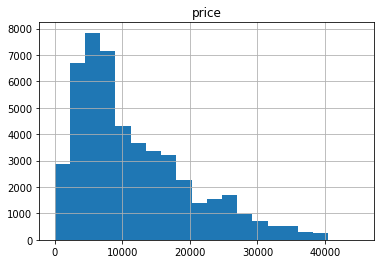

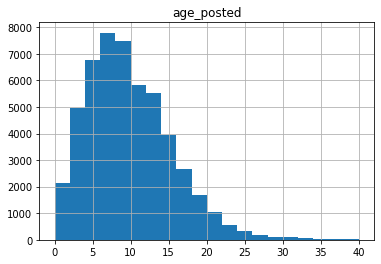

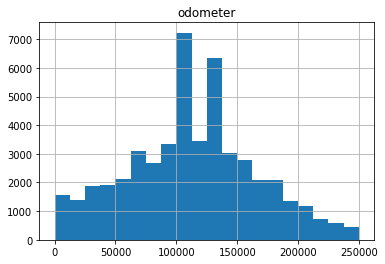

In [37]:
filtered_data['price'].hist(bins=20, range=(0, 45000))
plt.title('price')
plt.show()
data['age_posted'].hist(bins=20, range=(0, 40))
plt.title('age_posted')
plt.show()
filtered_data['odometer'].hist(bins=20)
plt.title('odometer')
plt.show()

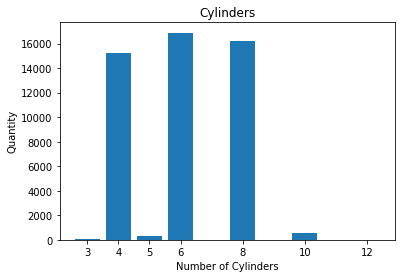

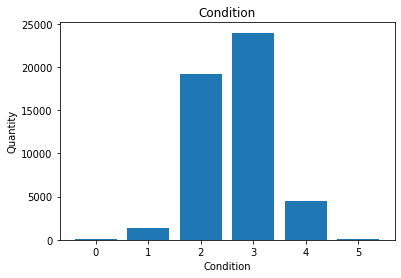

In [38]:
cyl_counts = filtered_data['cylinders'].value_counts().sort_index()
plt.bar(cyl_counts.index, cyl_counts.values)
plt.xticks(cyl_counts.index)
plt.title("Cylinders")
plt.xlabel("Number of Cylinders")  
plt.ylabel("Quantity")
plt.show()

cond_counts = filtered_data['condition'].value_counts()
plt.bar(cond_counts.index, cond_counts.values)
plt.title("Condition")
plt.xlabel("Condition")
plt.ylabel("Quantity")
plt.show()

## Periodo de colocación de los anuncios



In [39]:
filtered_data['days_listed'].describe()

count    49255.000000
mean        39.544696
std         28.220112
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

La media es 40 dias (redondeado) y la mediana 33.

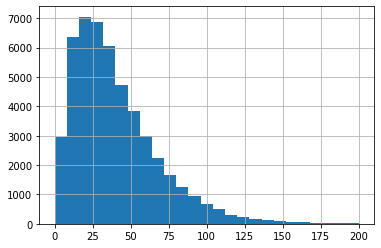

In [40]:
filtered_data['days_listed'].hist(bins=25, range=(0, 200))
plt.show()

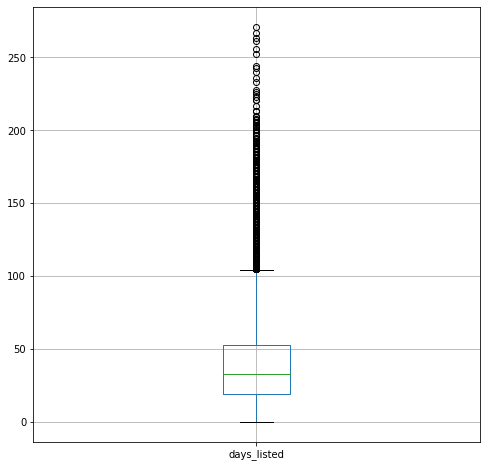

In [41]:
filtered_data.boxplot(column='days_listed', figsize=(8,8))
plt.show()

Un anuncio normal suele durar entre 20 a 51 dias posteado, algo mayor a 102 dias ya seria anormal.

## Precio promedio por cada tipo de vehículo

In [42]:
type_price_stat=filtered_data.pivot_table(index='type', values='price', aggfunc='median')

type_price_stat

,price
type,
bus,10500
convertible,11700
coupe,12925
hatchback,5995
mini-van,6500
offroad,12000
other,8995
pickup,14785
sedan,5995


In [43]:
type_ads_stat=filtered_data['type'].value_counts()
type_ads_stat

suv            12026
sedan          11989
truck          11527
pickup          6523
coupe           2078
wagon           1497
mini-van        1140
hatchback       1014
van              618
convertible      378
other            242
offroad          199
bus               24
Name: type, dtype: int64

In [44]:
type_stat=type_price_stat.join(type_ads_stat)
type_stat.columns = ['price', 'ads']
type_stat = type_stat.sort_values('ads', ascending=False)
type_stat

,price,ads
type,,
suv,8900,12026
sedan,5995,11989
truck,14995,11527
pickup,14785,6523
coupe,12925,2078
wagon,7900,1497
mini-van,6500,1140
hatchback,5995,1014
van,7995,618


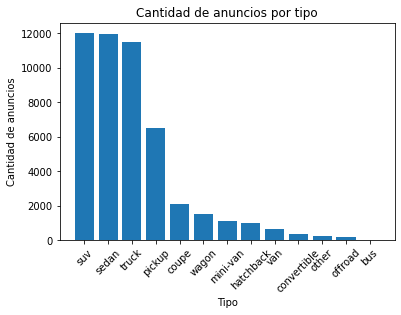

In [45]:
type_stat=type_price_stat.join(type_ads_stat) 
type_stat.columns = ['price', 'ads']
type_stat = type_stat.sort_values('ads', ascending=False)

plt.bar(type_stat.index, type_stat['ads'])
plt. title('Cantidad de anuncios por tipo')
plt.xticks(rotation=45) 
plt.xlabel('Tipo')
plt.ylabel('Cantidad de anuncios')

plt.show()

Los 2 tipos de vehiculo, con mayor número de anuncios (más populares) son el SUV, en primer lugar, seguido muy parejo por el tipo sedán.

## Factores de precio

In [46]:
suv_data = filtered_data.query('type == "suv"')
suv_data = suv_data[['price', 'age_posted', 'odometer', 'condition', 'transmission', 'paint_color']]
suv_data = suv_data.reset_index(drop=True)
suv_data.head()

,price,age_posted,odometer,condition,transmission,paint_color
0,9400,8.0,145000.0,2,automatic,NaN
1,15990,7.0,109473.0,3,automatic,black
2,11500,7.0,104174.0,3,automatic,NaN
3,9200,12.0,147191.0,3,automatic,blue
4,12990,11.0,132285.0,3,automatic,black


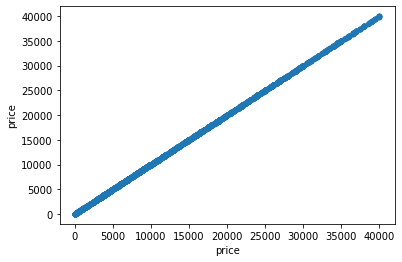

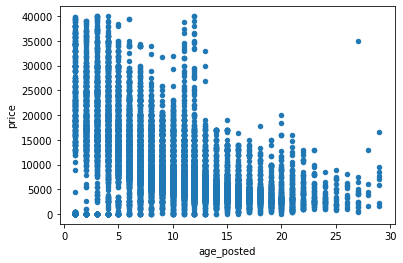

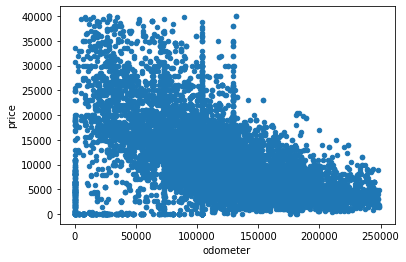

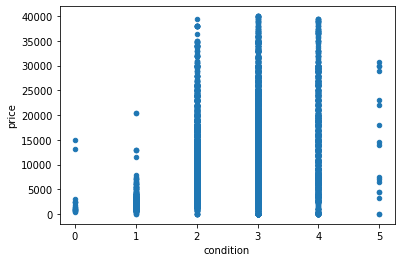

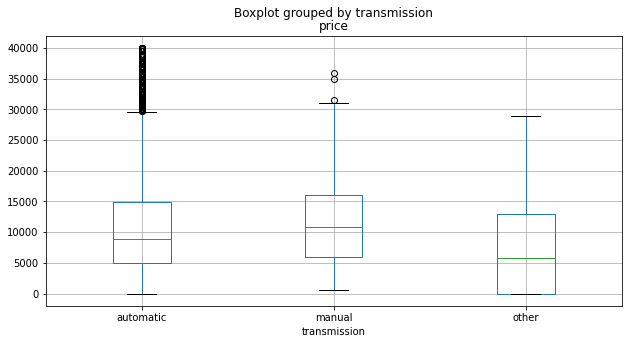

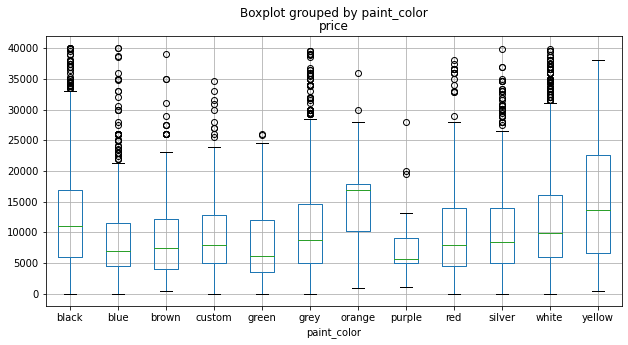

In [47]:
for col in suv_data.columns:
    if (col == 'transmission')|(col == 'paint_color'):
        suv_data.boxplot(column='price', by=col, figsize=(10, 5))
        plt.show()
        
    else:#for the rest
        suv_data.plot(x=col, y='price', kind='scatter')
        plt.show()

In [48]:
suv_data.corr()

,price,age_posted,odometer,condition
price,1.000000,-0.570678,-0.496718,0.269407
age_posted,-0.570678,1.000000,0.552748,-0.314745
odometer,-0.496718,0.552748,1.000000,-0.354776
condition,0.269407,-0.314745,-0.354776,1.000000


Basado en la matriz, parece ser que la edad del vehiculo es lo más importante a la hora de su relación con el precio, lo cual es lógico, y lo segundo más importante es el kilometraje que este tenga.

Del diagrama de caja, puedo ver que los SUV de transmision manual y de color amarillo, suelen tener los precios más altos, respecto a sus categorías.

In [49]:
sedan_data = filtered_data.query('type == "sedan"')
sedan_data = sedan_data[['price', 'age_posted', 'odometer', 'condition', 'transmission', 'paint_color']]
sedan_data = sedan_data.reset_index(drop=True)
sedan_data.head()

,price,age_posted,odometer,condition,transmission,paint_color
0,5500,7.0,110000.0,4,automatic,red
1,14900,3.0,80903.0,3,automatic,black
2,14990,5.0,57954.0,3,automatic,black
3,12990,4.0,79212.0,3,automatic,white
4,8990,8.0,111142.0,3,automatic,grey


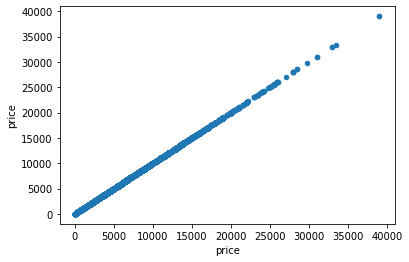

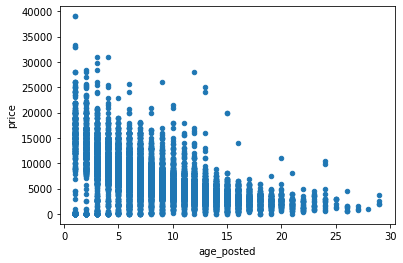

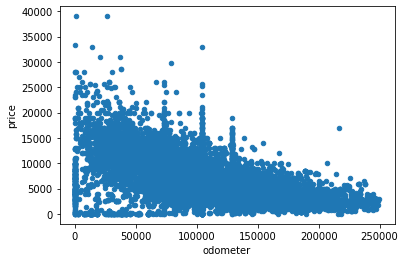

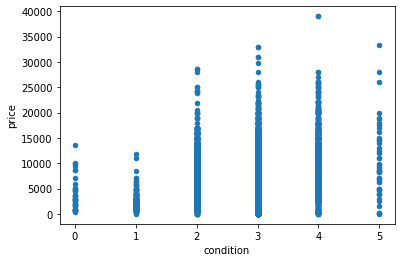

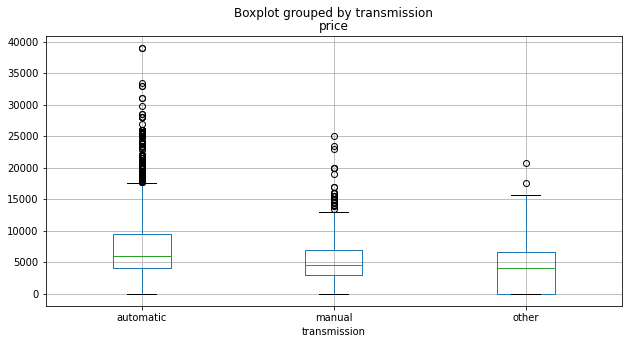

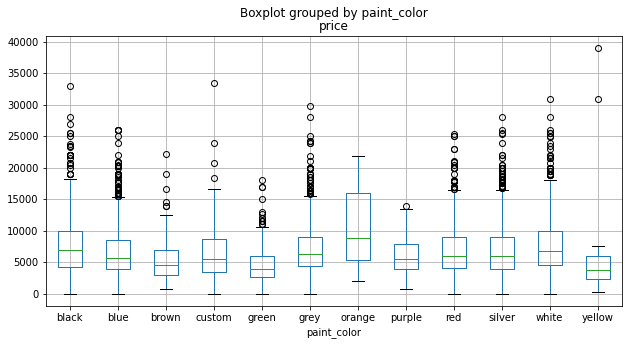

In [50]:
for col in sedan_data.columns:
    if (col == 'transmission')|(col == 'paint_color'):
        sedan_data.boxplot(column='price', by=col, figsize=(10, 5))
        plt.show()
    else:
        sedan_data.plot(x=col, y='price', kind='scatter')
        plt.show()

In [51]:
sedan_data.corr()

,price,age_posted,odometer,condition
price,1.000000,-0.611396,-0.518404,0.292214
age_posted,-0.611396,1.000000,0.541796,-0.293994
odometer,-0.518404,0.541796,1.000000,-0.356507
condition,0.292214,-0.293994,-0.356507,1.000000


La matriz muestra que la edad y el kilometraje están fuertemente correlacionados con el precio, de manera negativa. Esto significa que cuanto mayor es la edad o el kilometraje de un coche, menor es su precio. El estado no está correlacionado con el precio, o su correlación no es lineal, esto quiere decir que el estado de un coche no tiene un efecto significativo en su precio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo en esta sección.
</div>

## Conclusión general



Analizé un conjunto de datos de anuncios gratuitos de Crankshaft List, de vehículos para ver qué factores impactan el precio. 

Encontré que el anuncio típico dura entre 20 y 51 días posteado, y los que duran más de 102 días son anormalmente largos. Y menor a 20 días es porque fueron retirados muy rápido.

Los dos tipos de vehículos con el mayor número de anuncios fueron SUV y sedanes.

También me di cuenta que la edad del vehiculo, el kilometraje, el color y el tipo de transmisión son los factores que más impactan el precio de un vehículo.

Los SUV amarillos con transmisión manual típicamente tienen los precios más altos en sus respectivas categorías.

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, César. Nos quedan algunos elementos tanto de forma como de fondo pendientes que debemos resolver para poder aprobar tu proyecto. He dejado comentarios a lo largo del documento para ello.
</div>

<div class="alert alert-block alert-danger">
    
# Comentarios generales #2
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo, César. Nos queda un elemento pendiente con la variable `cylinders` y estaremos listos para aprobar tu proyecto.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales #3
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido, César. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>